<a href="https://colab.research.google.com/github/Dain777666/ESAA_25-2/blob/main/OB_WEEK6_Practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Twitter Sentiment Analysis with Supervised Learning**

1. Initial data transformation
2. Simple visualization
3. Logistic Regression model

In [23]:
import numpy as np
import pandas as pd
import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

## **1. 데이터 불러오기**

* twitter_training 데이터는 train으로, twitter_validation 데이터는 val로 불러오세요.
  * `header=None` 옵션으로 불러오세요.

In [3]:
train = pd.read_csv('twitter_training.csv', header=None)
val = pd.read_csv('twitter_validation.csv', header=None)

In [4]:
train.head()

,0,1,2,3
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


In [5]:
val.head()

,0,1,2,3
0,3364,Facebook,Irrelevant,I mentioned on Facebook that I was struggling ...
1,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
2,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
3,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
4,4433,Google,Neutral,Now the President is slapping Americans in the...


## **2. 전처리**
* train은 훈련 데이터셋, val은 검증 데이터셋입니다.
* 각 열의 이름을 id, information, type, text로 설정해주세요.

In [8]:
train.columns = ['id', 'information', 'type', 'text']
val.columns = ['id', 'information', 'type', 'text']

In [9]:
train.head()

,id,information,type,text
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


In [10]:
val.head()

,id,information,type,text
0,3364,Facebook,Irrelevant,I mentioned on Facebook that I was struggling ...
1,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
2,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
3,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
4,4433,Google,Neutral,Now the President is slapping Americans in the...


In [11]:
# train 데이터와 val 데이터의 text 열을 소문자로 바꾸고, NaN 값은 공백으로 대체하는 코드를 작성하세요.
train['text'] = train['text'].str.lower().fillna('')
val['text'] = val['text'].str.lower().fillna('')

In [12]:
# train 데이터와 val 데이터의 text 열 중 영어 문자열이 아닌 문자는 모두 공백으로 변환하는 코드를 작성하세요.
train['text'] = train['text'].str.replace('[^a-zA-Z]', ' ', regex=True)
val['text'] = val['text'].str.replace('[^a-zA-Z]', ' ', regex=True)

## **3. 시각화**
* information(각 브랜드) 별 type의 개수를 보여주는 막대 그래프를 그리세요.
  * x축에는 Brand가, y축에는 Number of tweets가 오도록하고, x축명, y축명을 각각 'Brand', 'Number of tweets'로 설정해주세요.
  * type별로 막대 색이 다르게 나올 수 있도록 설정해주세요.
  * 제안 : groupby를 사용하여 데이터프레임을 만든 후 시각화하셔도 됩니다.

In [13]:
train.groupby(['information', 'type']).size()

information      type      
Amazon           Irrelevant     192
                 Negative       576
                 Neutral       1236
                 Positive       312
ApexLegends      Irrelevant     192
                               ... 
Xbox(Xseries)    Positive       792
johnson&johnson  Irrelevant     198
                 Negative       846
                 Neutral       1014
                 Positive       270
Length: 128, dtype: int64

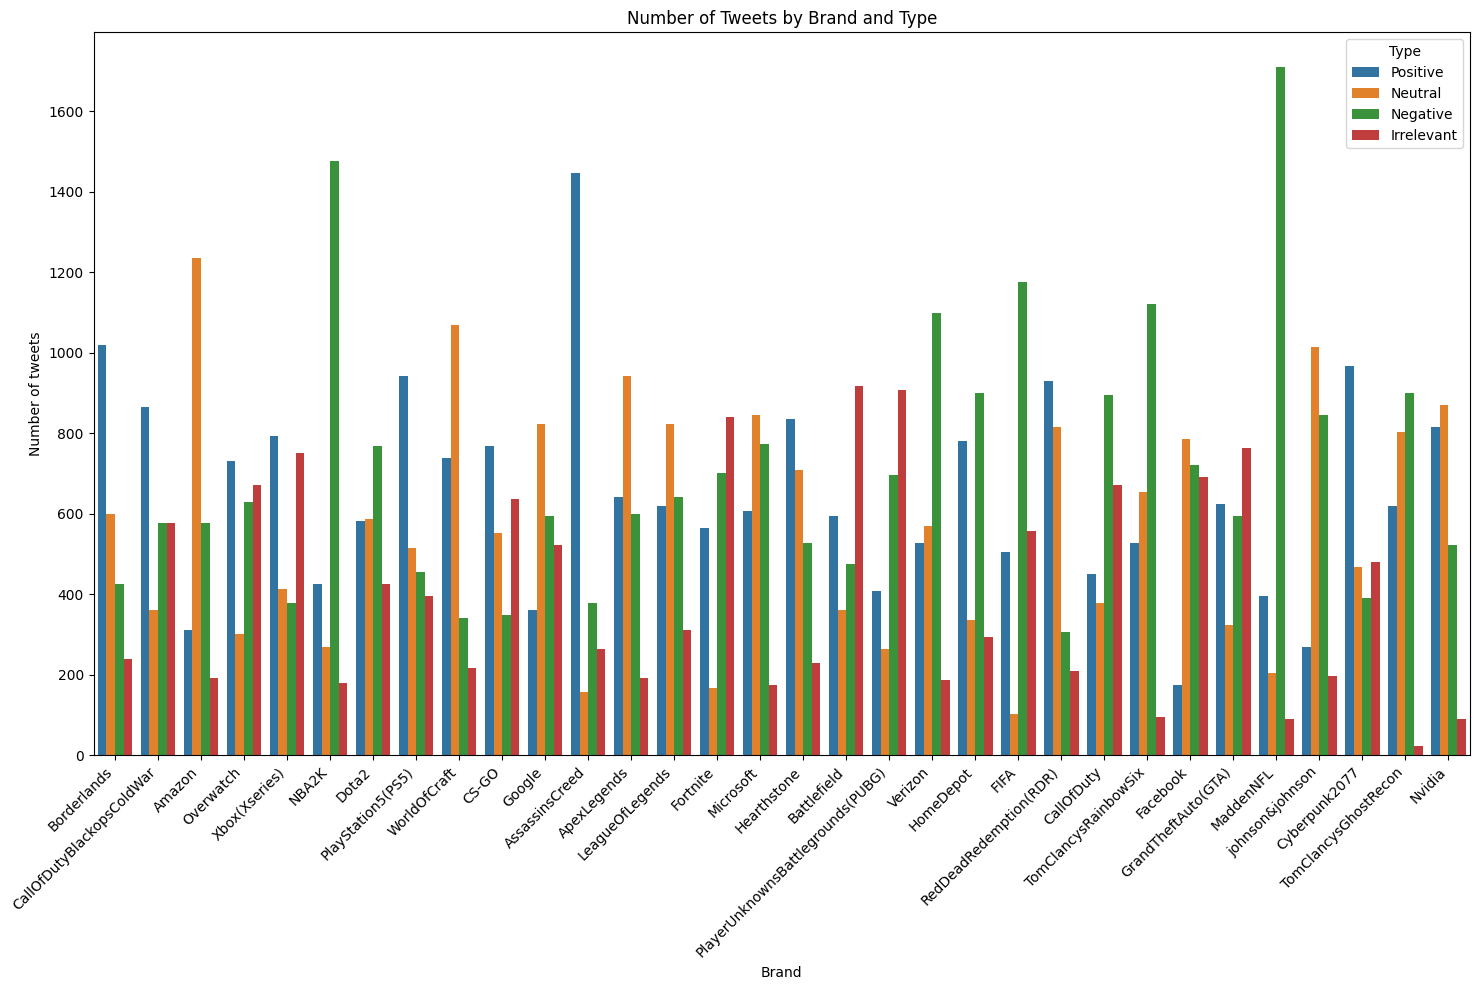

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

# Brand별 type 개수를 구함
brand_type_counts = train.groupby(['information', 'type']).size().reset_index(name='Number of tweets')

# 시각화
plt.figure(figsize=(15,10))
sns.countplot(data=train, x='information', hue='type')  # Brand별 type 개수 시각화
plt.xlabel('Brand')
plt.ylabel('Number of tweets')
plt.title('Number of Tweets by Brand and Type')
plt.legend(title='Type')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


## **4. 피처 벡터화 변환과 머신러닝 모델 학습/예측/평가**
* Count 벡터화를 적용해 예측 성능을 측정해보세요.
    * Classifier는 LogisticRegression을 이용합니다.
    * 예측 성능 평가는 다중 분류임을 고려해 정확도, F1 score, 혼동행렬을 모두 측정합니다. Classification Report를 출력해도 무방합니다.
    * `tokenizer=word_tokenize, stop_words='english', ngram_range=(1, 1)`으로 지정해주세요.
    * 파이프라인 객체를 이용하는 것은 선택 사항입니다.

/usr/local/lib/python3.12/dist-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.9360
F1 Score: 0.9361

Classification Report:
              precision    recall  f1-score   support

  Irrelevant       0.96      0.90      0.93       172
    Negative       0.94      0.95      0.94       266
     Neutral       0.95      0.94      0.95       285
    Positive       0.90      0.95      0.92       277

    accuracy                           0.94      1000
   macro avg       0.94      0.93      0.94      1000
weighted avg       0.94      0.94      0.94      1000



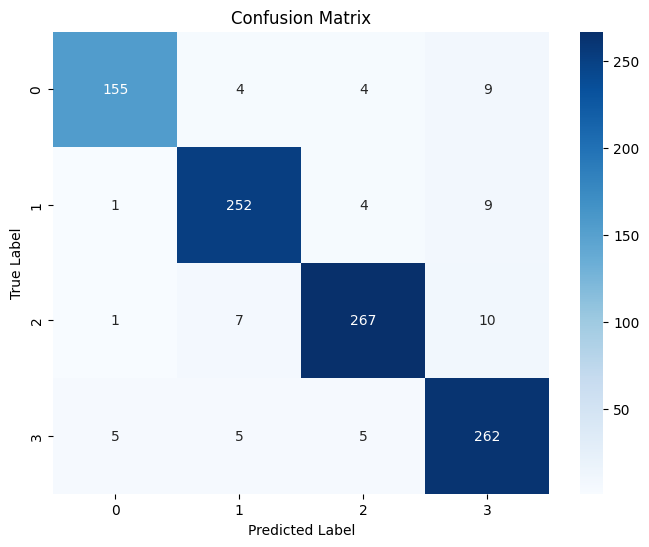

In [25]:
# 모델링
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report
from nltk.tokenize import word_tokenize

# Train 데이터로 학습
vectorizer = CountVectorizer(tokenizer=word_tokenize,
                             stop_words='english',
                             ngram_range=(1, 1))

X_train_vec = vectorizer.fit_transform(train['text'])
X_val_vec = vectorizer.transform(val['text'])

model = LogisticRegression()
model.fit(X_train_vec, train['type'])

# Validation 데이터로 예측
y_pred = model.predict(X_val_vec)

# 평가 결과 출력
accuracy = accuracy_score(val['type'], y_pred)
f1 = f1_score(val['type'], y_pred, average='weighted')  # 다중분류 → weighted 평균
cm = confusion_matrix(val['type'], y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"F1 Score: {f1:.4f}")
print("\nClassification Report:")
print(classification_report(val['type'], y_pred))

# 혼동 행렬 시각화
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

* TF-IDF 벡터화를 적용해 예측 성능을 측정해 보세요.
    * Classifier는 LogisticRegression을 이용합니다.
    * 예측 성능 평가는 다중 분류임을 고려해 정확도, F1 score, 혼동행렬을 모두 측정합니다. Classification Report를 출력해도 무방합니다.
    * `stop_words='english', ngram_range=(1, 2)`으로 지정해주세요.
    * 파이프라인 객체를 이용하는 것은 선택 사항입니다.


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.9660
F1 Score: 0.9660

Classification Report:
              precision    recall  f1-score   support

  Irrelevant       0.98      0.95      0.96       172
    Negative       0.97      0.98      0.98       266
     Neutral       0.96      0.97      0.97       285
    Positive       0.95      0.96      0.95       277

    accuracy                           0.97      1000
   macro avg       0.97      0.96      0.97      1000
weighted avg       0.97      0.97      0.97      1000



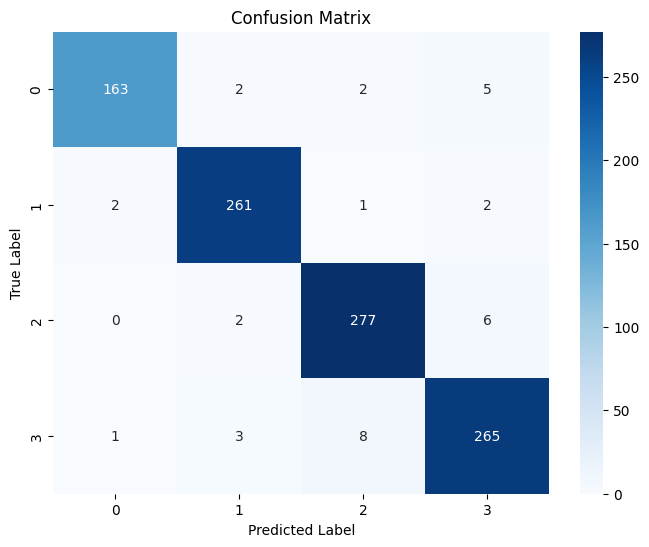

In [27]:
from sklearn.feature_extraction.text import TfidfVectorizer

# 모델링
# Train 데이터로 학습
vectorizer = TfidfVectorizer(stop_words='english', ngram_range=(1, 2))

X_train_vec = vectorizer.fit_transform(train['text'])
X_val_vec = vectorizer.transform(val['text'])

model = LogisticRegression()
model.fit(X_train_vec, train['type'])

# Validation 데이터로 예측
y_pred = model.predict(X_val_vec)

# 평가 결과 출력
accuracy = accuracy_score(val['type'], y_pred)
f1 = f1_score(val['type'], y_pred, average='weighted')  # 다중분류 → weighted 평균
cm = confusion_matrix(val['type'], y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"F1 Score: {f1:.4f}")
print("\nClassification Report:")
print(classification_report(val['type'], y_pred))

# 혼동 행렬 시각화
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

## **5. 최적화** (보너스 문제)

파라미터를 조절하여 가장 높은 정확도를 가지는 모델을 만들고, 조원들과 공유해보세요.

* 제안
    * CountVectorizer, TfidfVectorizer에서는 `stop_words, ngram_range` 조절
    * LogisticRegression에서는 `C, max_iter` 조절